## Develop Weighted Mean Workflow for Calculating SVIs
This notebook will take the intersected shapefile created in previous the notebook and use the results to calculate a spatially weight mean value for the 5 SVI values input into each CDP area.

In [1]:
# import all the libraries
import numpy as np
import matplotlib as mp
import fiona
import shapely
from shapely.geometry import Polygon, LineString
import pandas as pd
import geopandas as gpd
import rasterio as rio
import rasterstats as rs
import matplotlib.pyplot as plt
from rasterio.plot import show
import mapclassify

#change default figure size
plt.rcParams['figure.figsize'] = (12,12)

In [4]:
cdps_svis = gpd.read_file(r"C:\NewMapsPlus\Map698\us-communities-fire\notebooks\data\cdps_svis.shp")

<AxesSubplot:>

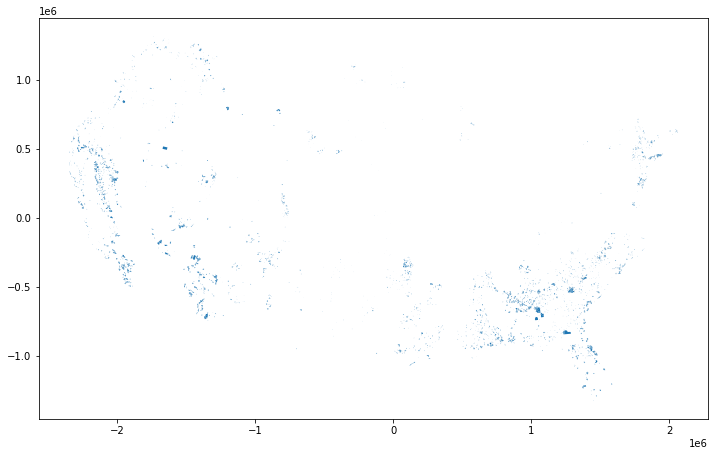

In [7]:
# plot the dataframe
cdps_svis.plot()

In [8]:
# look at the table real quick
cdps_svis.head()

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,RPL_THEME1,RPL_THEME2,...,RPL_THEMES,AFFGEOID_x,GEOID,NAME_x,NAMELSAD_x,STUSPS_x,STATE_NAME,Acres_x,majority,geometry
0,01,ALABAMA,AL,01015,Calhoun,01015981903,"Census Tract 9819.03, Calhoun County, Alabama",13.926276,-999.0000,-999.0000,...,-999.0000,1600000US0101852,0101852,Anniston,Anniston city,AL,Alabama,29363.026855,3.0,"MULTIPOLYGON (((944379.380 -539001.287, 944531..."
1,01,ALABAMA,AL,01015,Calhoun,01015000200,"Census Tract 2, Calhoun County, Alabama",2.624693,0.7799,0.8169,...,0.5622,1600000US0101852,0101852,Anniston,Anniston city,AL,Alabama,29363.026855,3.0,"POLYGON ((940338.282 -538071.843, 940605.753 -..."
2,01,ALABAMA,AL,01015,Calhoun,01015000300,"Census Tract 3, Calhoun County, Alabama",1.011936,0.9667,0.9727,...,0.8439,1600000US0101852,0101852,Anniston,Anniston city,AL,Alabama,29363.026855,3.0,"POLYGON ((939294.054 -537838.280, 939408.130 -..."
3,01,ALABAMA,AL,01015,Calhoun,01015000900,"Census Tract 9, Calhoun County, Alabama",4.677727,0.5055,0.9057,...,0.5054,1600000US0101852,0101852,Anniston,Anniston city,AL,Alabama,29363.026855,3.0,"MULTIPOLYGON (((946730.589 -539546.259, 946730..."
4,01,ALABAMA,AL,01015,Calhoun,01015001000,"Census Tract 10, Calhoun County, Alabama",6.438867,0.4721,0.6984,...,0.5074,1600000US0101852,0101852,Anniston,Anniston city,AL,Alabama,29363.026855,3.0,"POLYGON ((940843.383 -544243.977, 940848.391 -..."
